# Lab 3.2 - Processing Dr. Bergen's Eagle Data with column selectors

Dr. Bergen, Director of the WSU Statistical Consulting Center, has a data processing task for you.  The associated data can be found in the `data` folder of this repository.  

Dr. Bergen had the following to say about the data.

 - One row = one GPS measurement.  
 - Subsample of 10K GPS points from a couple bald eagles in Iowa. 
 - **Context.** need to use the flight characteristics to perform $k$-means clustering of the flight points.  
 
Variables to be used for clustering include

- `KPH` (km per hour; an instantaneous measure of speed; measured by the GPS device);
- `Sn` (an average speed; given 2 time points and at locations and something like );
- `AGL0` (meters above ground level);
- `VerticalRate` (change in AGL between two time points; large negative if descending quickly; large positive if ascending quickly);
- `absVR` (absolute value of VerticalRate); and
- `abs_angle`c(absolute value of turn angle, in radians; larger values equal more “tortuous”, i.e. twisty flight)

All variables except for `VerticalRate` are skewed and all variables need to be mean-centered and standardized prior to clustering.

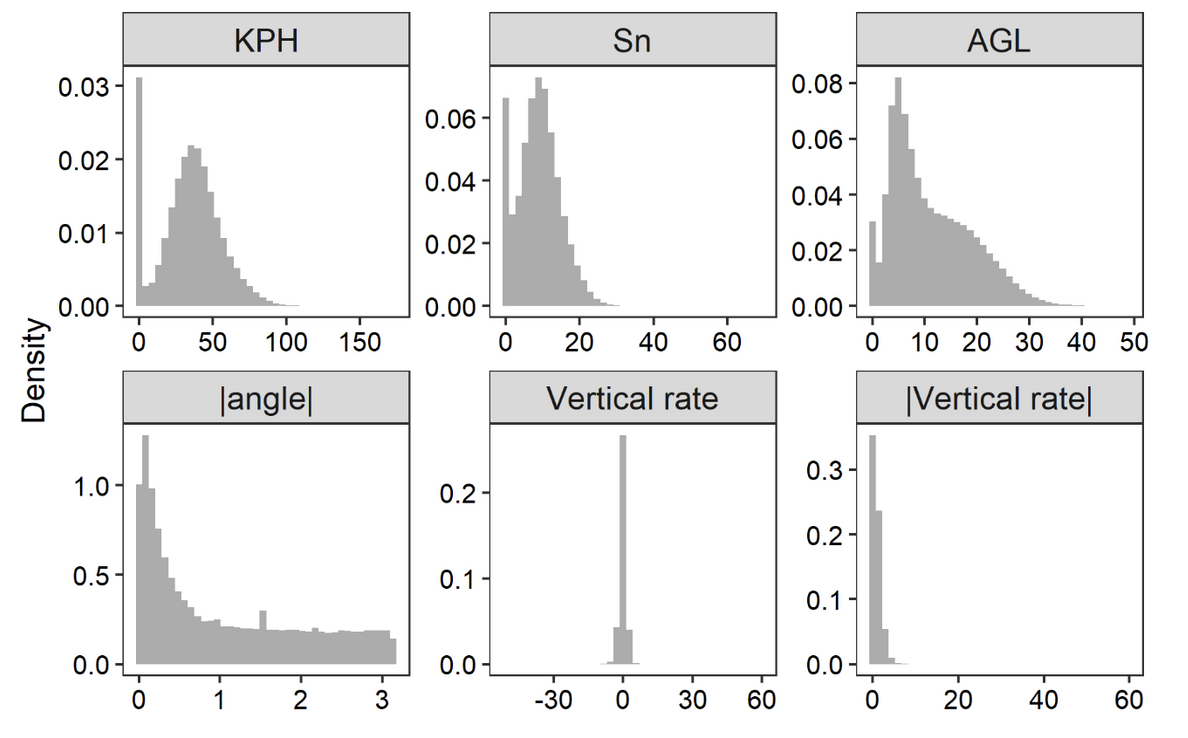

Note that data is 

- *mean-centered* by subtracting the mean of the column from each entry.
- *standardized* by dividing each entry by the standard deviation of the column.

### Tasks

You need to use the techniques from this modules lectures to perform the following tasks.

- Apply `sqrt` transform to `KPH`, `Sn`, `AGL0`, `absVR` and `abs_angle`
- Mean-center and standardize transformed variables from above as well as `VerticalRate`
- Visualize the transformed features.  Use a [seaborn multi-plot grid](https://seaborn.pydata.org/tutorial/axis_grids.html) to plot all the variables on the same panel.  **HINT.** To make this work, you will need to stack all of the transformed features.

In this lab, you will redo your work from the previous lab, but this time using `polars` column selectors to clean up the tasks.

#### Problem 1

Before we redo the solution using column selectors, please copy your **Problem 3** and **Problem 5** solutions from the previous lab and answer the following questions.

In [4]:
# Code for dict unpacking here
# Import necessary libraries
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
eagles = pl.read_csv('./data/bald_eagle_subsample.csv')

# List of columns to transform
columns_to_transform = ['KPH', 'Sn', 'AGL0', 'abs_angle', 'absVR']

# Dict comprehension to generate a dictionary of column name/expression pairs
transformations_dict = {
    f'transformed_{col}': ((pl.col(col).sqrt() - pl.col(col).mean()) / pl.col(col).std()) 
    for col in columns_to_transform
}

# Using dict unpacking with ** in with_columns
eagles_transformed_dict = eagles.with_columns(**transformations_dict)

# Display the result of the transformations
eagles_transformed_dict.head()

Animal_ID,Sex,Age2,LocalTime,KPH,Sn,AGL0,VerticalRate,abs_angle,absVR,transformed_KPH,transformed_Sn,transformed_AGL0,transformed_abs_angle,transformed_absVR
i64,str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
105,"""F""","""Fledgling""","""7/4/19 9:01""",32.81,6.89,0.02,-0.002167,0.006277,0.002167,-2.510558,-1.90547,-1.074305,-1.100004,-1.14271
105,"""F""","""Fledgling""","""7/4/19 9:01""",29.63,7.79,0.0,-0.12,0.57,0.12,-2.529461,-1.868502,-1.07498,-0.39043,-0.816809
106,"""F""","""Fledgling""","""7/6/19 7:02""",35.42,8.58,13.15,0.49,2.01,0.49,-2.495719,-1.837779,-1.05768,0.3055,-0.432515
106,"""F""","""Fledgling""","""7/6/19 7:02""",32.87,9.13,10.88,-0.45,1.1,0.45,-2.510211,-1.817218,-1.059244,-0.0819,-0.464228
106,"""F""","""Fledgling""","""7/6/19 7:02""",35.37,10.01,7.28,-0.72,0.37,0.72,-2.495998,-1.785568,-1.062108,-0.54448,-0.271089


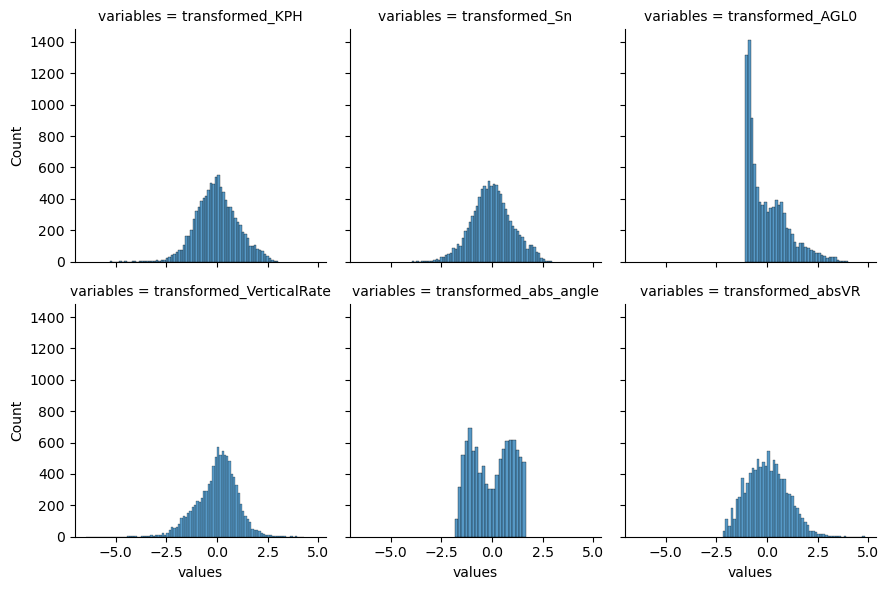

In [10]:
# Import necessary libraries
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
eagles = pl.read_csv('./data/bald_eagle_subsample.csv')

# Display the first few rows of the dataset
eagles.head()

# Data transformation steps
eagles_NEW = (eagles
             .with_columns(
                 # Apply square root transformations
                 pl.col('KPH').sqrt().alias('KPH'),
                 pl.col('Sn').sqrt().alias('Sn'),
                 pl.col('AGL0').sqrt().alias('AGLO'),
                 pl.col('abs_angle').sqrt().alias('abs_angle'),
                 pl.col('absVR').sqrt().alias('absVR')
             )
             .with_columns(
                 # Standardize the transformed columns
                 transformed_KPH = (pl.col('KPH') - pl.col('KPH').mean()) / pl.col('KPH').std(),
                 transformed_Sn = (pl.col('Sn') - pl.col('Sn').mean()) / pl.col('Sn').std(),
                 transformed_AGL0 = (pl.col('AGL0') - pl.col('AGL0').mean()) / pl.col('AGL0').std(),
                 transformed_VerticalRate = (pl.col('VerticalRate') - pl.col('VerticalRate').mean()) / pl.col('VerticalRate').std(),
                 transformed_abs_angle = (pl.col('abs_angle') - pl.col('abs_angle').mean()) / pl.col('abs_angle').std(),
                 transformed_absVR = (pl.col('absVR') - pl.col('absVR').mean()) / pl.col('absVR').std()
             )
            )

# Show the first few rows of the transformed dataset
eagles_NEW.head()

# List of the transformed columns to stack
transformed_cols = ['transformed_KPH', 'transformed_Sn', 'transformed_AGL0', 
                    'transformed_VerticalRate', 'transformed_abs_angle', 
                    'transformed_absVR']

# Unpivot the dataset
eagles_stacked = (eagles_NEW
                 .unpivot(transformed_cols, 
                          index='Animal_ID', 
                          variable_name='variables', 
                          value_name='values')
                )
g = sns.FacetGrid(eagles_stacked, col='variables', col_wrap=3)
g.map(sns.histplot, 'values')



**Tasks.**

Complete each of the following tasks.
1. Identify all locations where you used a comprehension to clean up the code.
2. Discuss how you might use a `polars` column selector to perform the same task.

<font color="orange">
    1. Answer 1 
    <br>
    2. Answer 2
    <br>
</font>

In [ ]:
eagles_transformed_dict = eagles.with_columns(
    ((pl.col(columns_to_transform).sqrt() - pl.col(columns_to_transform).mean()) / pl.col(columns_to_transform).std())
)


In [ ]:
eagles_NEW = eagles.with_columns(
    pl.col(columns_to_transform).sqrt().alias(columns_to_transform)
).with_columns(
    ((pl.col(columns_to_transform) - pl.col(columns_to_transform).mean()) / pl.col(columns_to_transform).std())
)

# To unpivot for visualization:
eagles_stacked = eagles_NEW.melt(
    id_vars=['Animal_ID'],
    value_vars=pl.col('transformed_*'),  # Use a pattern to match all transformed columns
    variable_name='variables',
    value_name='values'
)


#### Problem 2

Now refactor your data management code to replace all comprehensions with expressions build using column selectors.  At each step, verify that the solution remains unchanged.

In [11]:
# Your refactored code here.
# Import necessary libraries
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
eagles = pl.read_csv('./data/bald_eagle_subsample.csv')

# List of columns to transform
columns_to_transform = ['KPH', 'Sn', 'AGL0', 'abs_angle', 'absVR']

# Apply transformations and mean-center/standardize using column selectors
eagles_transformed_dict = eagles.with_columns(
    ((pl.col(columns_to_transform).sqrt() - pl.col(columns_to_transform).mean()) / pl.col(columns_to_transform).std())
)

# Display the first few rows to verify
eagles_transformed_dict.head()


Animal_ID,Sex,Age2,LocalTime,KPH,Sn,AGL0,VerticalRate,abs_angle,absVR
i64,str,str,str,f64,f64,f64,f64,f64,f64
105,"""F""","""Fledgling""","""7/4/19 9:01""",-2.510558,-1.90547,-1.074305,-0.002167,-1.100004,-1.14271
105,"""F""","""Fledgling""","""7/4/19 9:01""",-2.529461,-1.868502,-1.07498,-0.12,-0.39043,-0.816809
106,"""F""","""Fledgling""","""7/6/19 7:02""",-2.495719,-1.837779,-1.05768,0.49,0.3055,-0.432515
106,"""F""","""Fledgling""","""7/6/19 7:02""",-2.510211,-1.817218,-1.059244,-0.45,-0.0819,-0.464228
106,"""F""","""Fledgling""","""7/6/19 7:02""",-2.495998,-1.785568,-1.062108,-0.72,-0.54448,-0.271089


In [15]:
# Print column names to verify their existence
print(eagles_NEW.columns)


['Animal_ID', 'Sex', 'Age2', 'LocalTime', 'KPH', 'Sn', 'AGL0', 'VerticalRate', 'abs_angle', 'absVR', 'transformed_KPH', 'transformed_Sn', 'transformed_AGL0', 'transformed_abs_angle', 'transformed_absVR']


['Animal_ID', 'Sex', 'Age2', 'LocalTime', 'KPH', 'Sn', 'AGL0', 'VerticalRate', 'abs_angle', 'absVR', 'KPH_transformed', 'Sn_transformed', 'AGL0_transformed', 'abs_angle_transformed', 'absVR_transformed', 'transformed_VerticalRate']


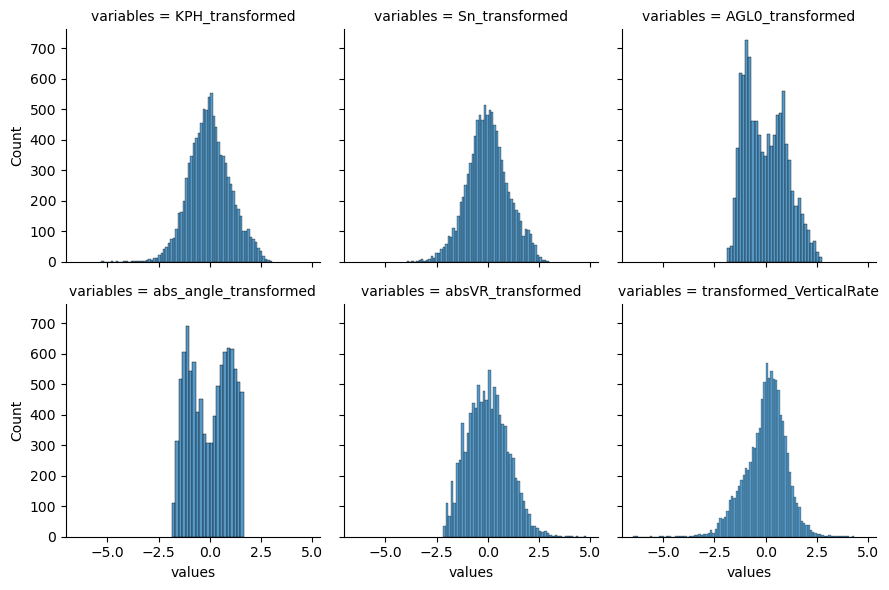

In [23]:
# Data transformation with column selectors
eagles_NEW = eagles.with_columns(
    # Apply square root transformations and rename columns with alias
    [pl.col(col).sqrt().alias(f"{col}_transformed") for col in columns_to_transform]
).with_columns(
    # Standardize the transformed columns using column selectors
    [(pl.col(f"{col}_transformed") - pl.col(f"{col}_transformed").mean()) / pl.col(f"{col}_transformed").std()
     for col in columns_to_transform]
).with_columns(
    # Standardize the 'VerticalRate' column and give it an alias
    ((pl.col('VerticalRate') - pl.col('VerticalRate').mean()) / pl.col('VerticalRate').std()).alias('transformed_VerticalRate')
)

# Verify the columns in the DataFrame
print(eagles_NEW.columns)

# Unpivot the transformed columns for visualization
eagles_stacked = eagles_NEW.unpivot(
    index=['Animal_ID'],  # Use 'Animal_ID' as the index column
    on=[f"{col}_transformed" for col in columns_to_transform] + ['transformed_VerticalRate'],  # Columns to unpivot
    variable_name='variables',
    value_name='values'
)

# Visualization using Seaborn
g = sns.FacetGrid(eagles_stacked.to_pandas(), col='variables', col_wrap=3)
g.map(sns.histplot, 'values')
plt.show()


# Problem 3

In [24]:
# Ensure the transformed columns are in a standardized format
standardized_columns = [f"{col}_transformed" for col in columns_to_transform] + ['transformed_VerticalRate']

# Unpivot the DataFrame using column selectors to convert it to a long format
eagles_stacked = eagles_NEW.unpivot(
    index=['Animal_ID'],  # Use 'Animal_ID' as the index column
    on=standardized_columns,  # Columns to stack
    variable_name='variables',
    value_name='values'
)

# Display the first few rows of the stacked DataFrame to verify
print(eagles_stacked.head())


shape: (5, 3)
┌───────────┬─────────────────┬───────────┐
│ Animal_ID ┆ variables       ┆ values    │
│ ---       ┆ ---             ┆ ---       │
│ i64       ┆ str             ┆ f64       │
╞═══════════╪═════════════════╪═══════════╡
│ 105       ┆ KPH_transformed ┆ -0.672224 │
│ 105       ┆ KPH_transformed ┆ -0.920741 │
│ 106       ┆ KPH_transformed ┆ -0.477126 │
│ 106       ┆ KPH_transformed ┆ -0.667653 │
│ 106       ┆ KPH_transformed ┆ -0.480794 │
└───────────┴─────────────────┴───────────┘


#### Problem 4

Use `plotnine` to create a plot similar to the one shown above, but with the standardized data, which should result in the following plot:

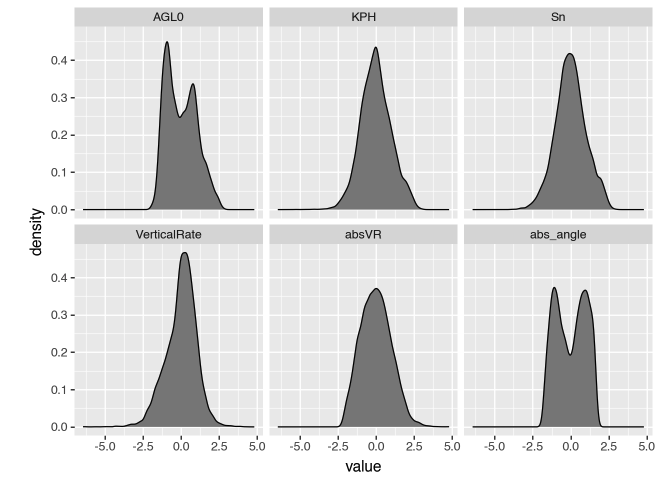

Note that
1. We use `geom_density` and `facet_wrap`, and
2. We set the `fill` to `"grey"`

C:\Users\at3571rj\AppData\Local\Temp\ipykernel_20680\3471063516.py:13: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


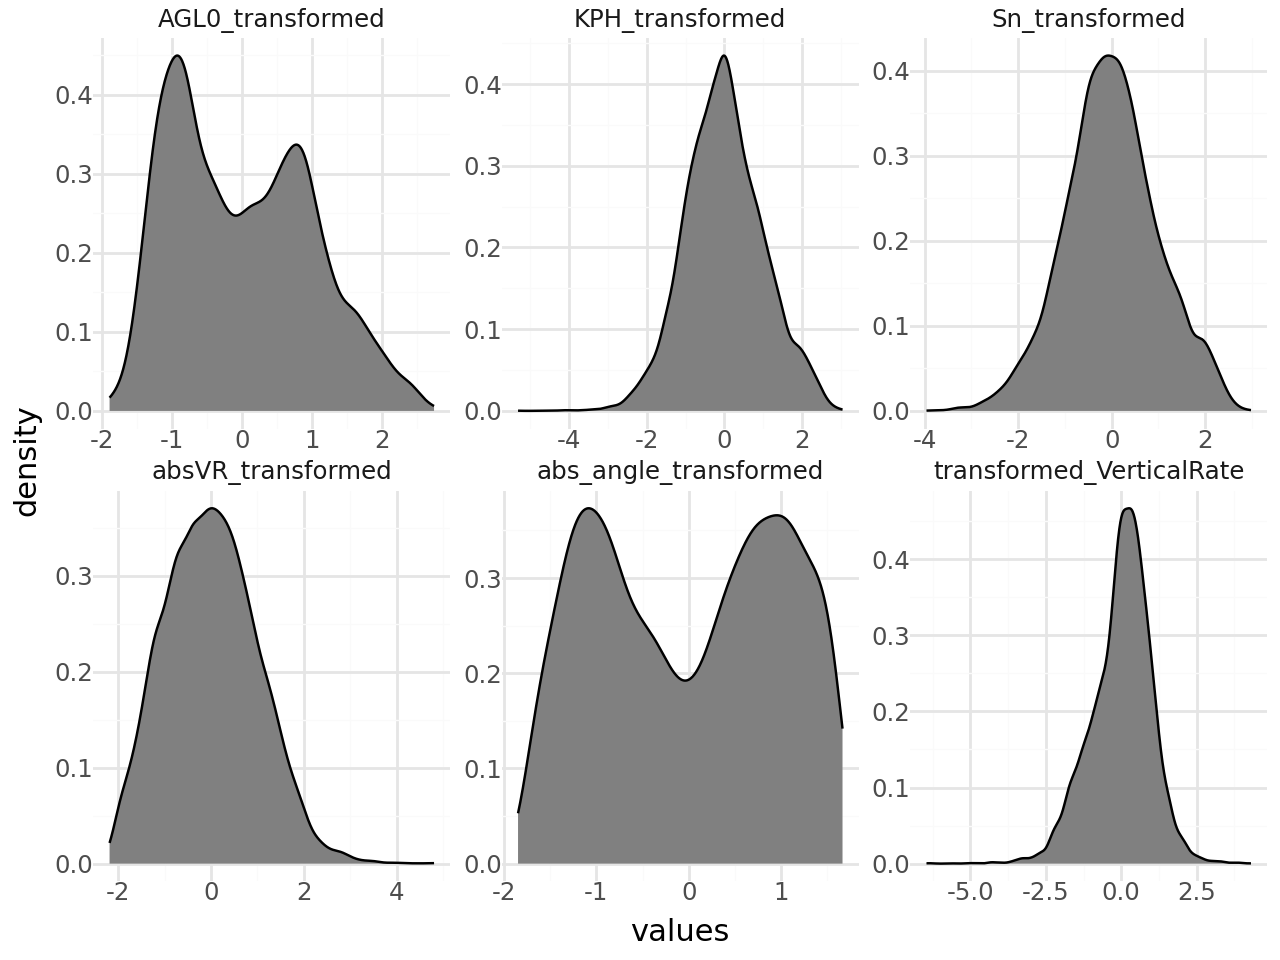

In [25]:
# Your visualization code here.
from plotnine import ggplot, aes, geom_density, facet_wrap, theme_minimal

# Create a plot using plotnine
plot = (
    ggplot(eagles_stacked.to_pandas(), aes(x='values'))
    + geom_density(fill='grey')
    + facet_wrap('~variables', scales='free')
    + theme_minimal()
)

# Display the plot
print(plot)
